# images

using https://platform.openai.com/docs/guides/images/usage?context=python

In [1]:
import sys
sys.path.append("../")

from blueflow import notebooks

from blue_options import string
from blue_objects import objects

from openai_commands.host import signature
from openai_commands.images.api import OpenAIImageGenerator
from openai_commands.logger import logger

logger.info(f"{'.'.join(signature())},\nbuilt on {string.pretty_date()}")

🛠️  openai_commands-3.210.1.blueflow-4.849.1.abcli-9.486.1.blue_objects-5.281.1.blue_options-4.200.1.torch-2.5.1.Python 3.9.6.Darwin 23.6.0..Jupyter-Notebook,
built on 01 February 2025, 12:16:19


---

In [2]:
prompt = "a person flying through the streets of Vancouver."

In [3]:
object_name = objects.unique_object("openai-images")
filename = objects.path_of(f"{string.timestamp()}.png",object_name)

🌀  📂 openai-images-2025-02-01-12-16-19-l67i2e


In [4]:
generator = OpenAIImageGenerator(verbose=True)

🛠️  OpenAIImageGenerator[dall-e-3]


🛠️  OpenAIImageGenerator.generate: a person flying through the streets of Vancouver. -> openai-images-2025-02-01-12-16-19-l67i2e/2025-02-01-12-16-19-uyk2z2.png
httpx HTTP Request: POST https://api.openai.com/v1/images/generations "HTTP/1.1 200 OK"
🛠️  {
    "created": 1738440990,
    "data": [
        {
            "b64_json": null,
            "revised_prompt": "An image of an individual smoothly in flight, making their way through the vibrant streets of the Canadian city, Vancouver. They are gliding over the bustling shopping districts and weaving through tall, contemporary skyscrapers. Their face radiates joy and surprise at the unusual experience. Among the streets, people of various descents such as Caucasian, Hispanic, and Black, can be seen going about their day, looking up in astonishment at the unique spectacle in the sky.",
            "url": "https://oaidalleapiprodscus.blob.core.windows.net/private/org-1RdONq0eTlgUUnFpmb7DZuWr/user-id8j8e4QMrQ8PpTpUxwnF9Cr/img-jb9qOzccLQrqB

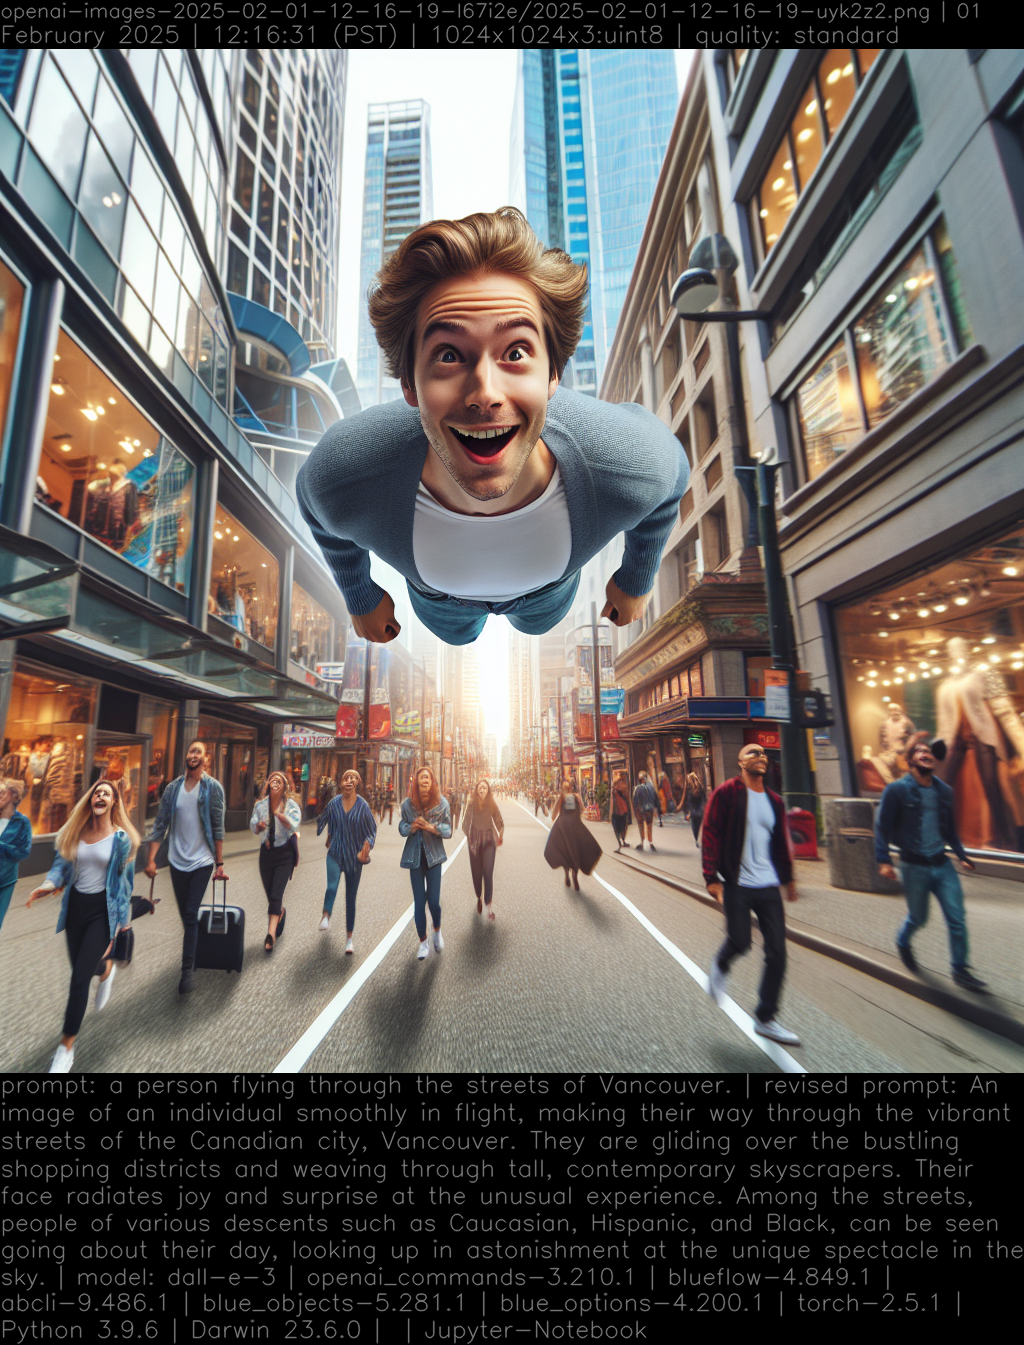

In [5]:
success, response = generator.generate(
    prompt=prompt,
    filename=filename)

assert success

---

In [6]:
assert objects.upload(object_name)

upload: ../../../storage/abcli/openai-images-2025-02-01-12-16-19-l67i2e/2025-02-01-12-16-19-uyk2z2.png to s3://kamangir/bolt/openai-images-2025-02-01-12-16-19-l67i2e/2025-02-01-12-16-19-uyk2z2.png


In [7]:
# END